In [343]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [344]:
# Functions

def smart_randomizer(parts_num: dict, Shape: int): #initially requires parts dict, but in fact only number of particles is needed
    coords2 = set()
    parts = {}
    j = 0
    while len(coords2) != parts_num:
        coords2.add((random.randint(1, Shape), random.randint(1, Shape)))
    for i in coords2:
        j += 1
        parts.update({'part'+str(j): i})
    return parts


def dist(part1, part2):
    return np.sqrt((part1[0] - part2[0])**2 + (part1[1] - part2[1])**2)

def pot_calc(parts):
    a = [] # matrix of inverse distances of old configuration
    for i in parts:
        c = [] # generate an empty list to append it to a after filling
        for j in parts:
            if i == j:
                c.append(0)
            else:
                c.append(1/dist(parts[i], parts[j]))
        a.append(c)
    pot = np.sum(np.array(a))/2
    return pot*(-1)

def jump_estimator(parts1, parts2):
    Prob = np.exp(-pot_calc(parts2)+pot_calc(parts1))
    if Prob > 1:
        return True
    else: 
        return False


In [357]:
# с тремя строчками ниже можно играться:

iter = 15000 # number of iterations (test)
shp = 20 # shape of the lattice
Parts_num = 20 # number of particles

particles_init = smart_randomizer(Parts_num, shp)

part_now = particles_init
i = 0
with open('out.txt', 'w') as outfile:
    outfile.write(f'INITIAL: {particles_init} \n')
    while i <= iter:
        i += 1
        part_rand = smart_randomizer(Parts_num, shp)
        if jump_estimator(part_now, part_rand) == True:
            part_now = part_rand
        else:
            continue
        outfile.write(f'NEW: {part_rand} \nENERGY: {pot_calc(part_rand)} \nJUMP? {jump_estimator(part_now, part_rand)} \n')
print(part_now)



{'part1': (9, 11), 'part2': (10, 12), 'part3': (11, 11), 'part4': (3, 9), 'part5': (3, 6), 'part6': (13, 4), 'part7': (11, 10), 'part8': (15, 4), 'part9': (13, 10), 'part10': (13, 13), 'part11': (18, 9), 'part12': (17, 4), 'part13': (3, 11), 'part14': (8, 7), 'part15': (9, 12), 'part16': (19, 13), 'part17': (8, 13), 'part18': (16, 5), 'part19': (13, 12), 'part20': (15, 12)}


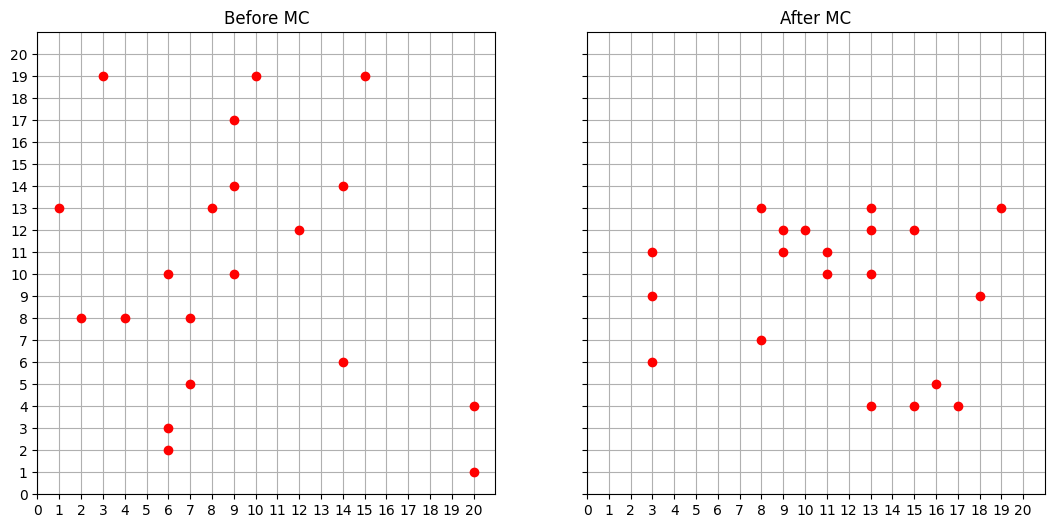

In [358]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6), sharey=True, sharex=False)

for i in particles_init.values():
    ax[0].plot(i[0], i[1], 'o', color='red')
    ax[0].set_ylim(0, shp+1)
    ax[0].set_xlim(0, shp+1)
    ax[0].set_title('Before MC')
    ax[0].set_xticks(np.arange(0, shp+1, 1))
    ax[0].set_yticks(np.arange(0, shp+1, 1))
for i in part_now.values():
    ax[1].plot(i[0], i[1], 'o', color='red')
    ax[1].set_ylim(0, shp+1)
    ax[1].set_xlim(0, shp+1)
    ax[1].set_title('After MC')
    ax[1].set_xticks(np.arange(0, shp+1, 1))
    ax[1].set_yticks(np.arange(0, shp+1, 1))
ax[0].grid()
ax[1].grid()
plt.show()